In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
data=pd.read_excel('lrm.xlsx')
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


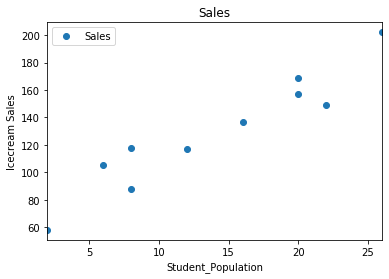

In [6]:
data.plot('Student_Population','Sales',style='o')
plt.ylabel('Icecream Sales')
plt.title('Sales')
plt.show()

In [7]:
t=data['Student_Population']
c=data['Sales']

In [8]:
import statsmodels.api as s
t=s.add_constant(t)
model=sm.OLS(c,t).fit()
model.summary()

C:\Users\Sridhar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Sridhar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        19:28:24   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
t=data['Student_Population'].values.reshape(-1,1)
c=data['Sales'].values.reshape(-1,1)
reg=LinearRegression()
reg.fit(t,c)
reg.intercept_[0],reg.coef_[0][0]

(60.0, 5.0)

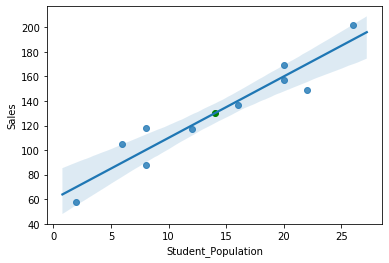

In [12]:
t=data['Student_Population']
c=data['Sales']
plt.figure()
sns.regplot(t,c,fit_reg=True)
plt.scatter(np.mean(t),np.mean(c),color='green')

In [16]:
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(model,alpha=0.05)
fittedvalues=data1[:,2]
predict_mean_se=data1[:,3]
predict_mean_ci_low,predict_mean_ci_upp=data1[:,4:6].T
predict_ci_low,predict_ci_upp=data1[:,6:8].T

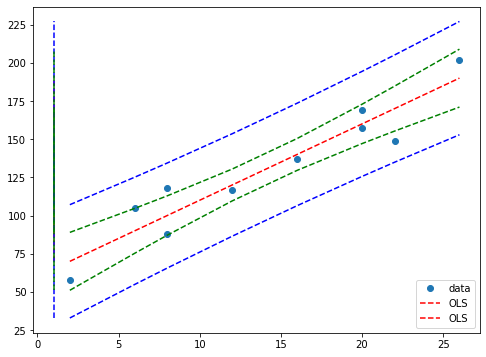

In [19]:
X=s.add_constant(t)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(t,c,'o',label='data')
ax.plot(X,fittedvalues,'r--',label='OLS')
ax.plot(X,predict_ci_low,'b--')
ax.plot(X,predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.legend(loc='best')
plt.show()